In [12]:
import numpy as np
import astropy
from astropy.io import ascii
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import pylab
from pylab import plot
from astropy.cosmology import WMAP9 as cosmo
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'
%config InlineBackend.figure_format='retina'

In [13]:
print 'Reading files'
w = ascii.read('wen.csv') 
r = fits.open('redmapper.fits') 
r = r[1].data

#print w 
#print r 

Reading files


In [14]:
print 'catalog with values RA and DEC'
cw = SkyCoord(ra = w['RAJ2000']*u.degree, dec = w['DEJ2000']*u.degree) 
cr = SkyCoord(ra = r['RA']*u.degree, dec = r['DEC']*u.degree) 

catalog with values RA and DEC


Histograms


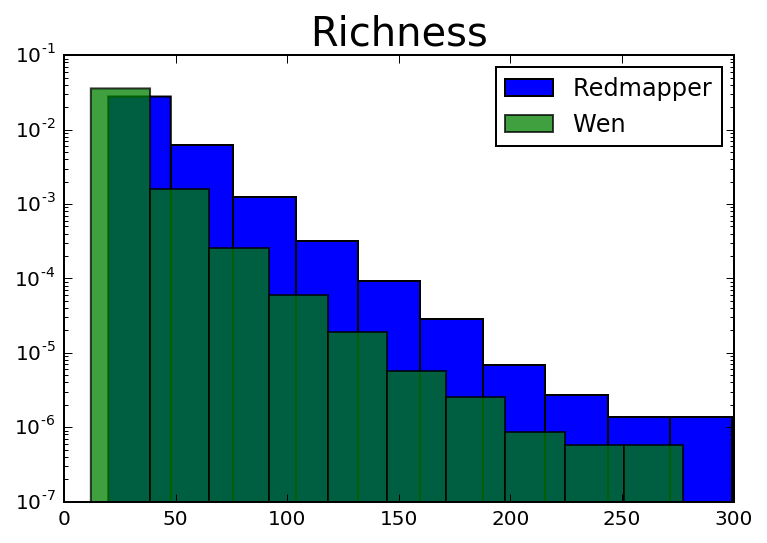

In [15]:
print 'Histograms'
h_r = plt.hist((r['LAMBDA']), normed=True, log = True, label = 'Redmapper')
h_r = plt.hist((w['RL*']), normed=True, log = True, label = 'Wen', alpha=0.75)
plt.legend()
plt.title('Richness', fontsize = '20')

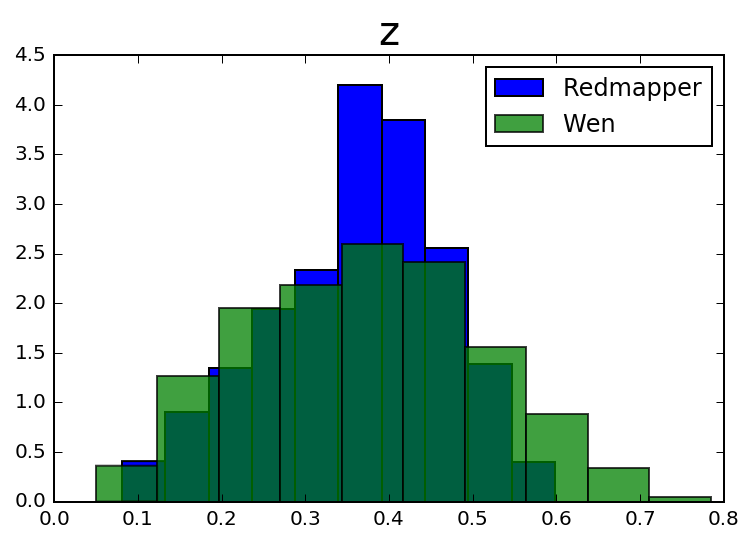

In [16]:
h_z = plt.hist(r['z_lambda'], normed=True, label = 'Redmapper')
h_z = plt.hist(w['zph'], normed=True, label = 'Wen', alpha=0.75)
plt.legend()
plt.title('z', fontsize='20')

In [17]:
print("\033[43;30mSky - Code, Histograms, Plots and Macth\033[m")
    
print 'match to catalog sky'
idx, d2d, d3d = cw.match_to_catalog_sky(cr) 
#print idx, d2d, d3d 

print 'match to catalog sky'
idx, d2d, d3d = cr.match_to_catalog_sky(cw) 
#print idx, d2d, d3d 

Sky - Code, Histograms, Plots and Macth
match to catalog sky
match to catalog sky


Plot ra x dec - sky


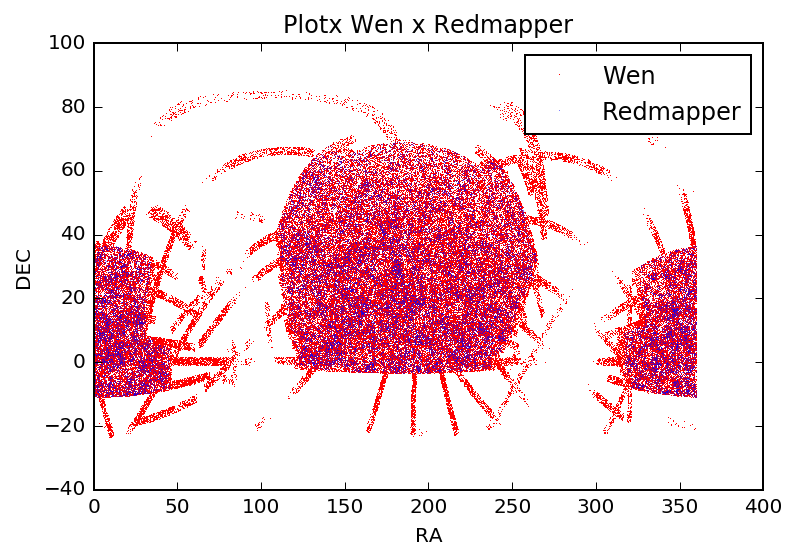

In [18]:
print 'Plot ra x dec - sky'
ra_w = w['RAJ2000']*u.deg
dec_w = w['DEJ2000']*u.deg

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(ra_w, dec_w, 'r,', label = 'Wen')

ra_r = r['RA']*u.deg 
dec_r = r['DEC']*u.deg

ax.plot(ra_r, dec_r, 'b,', label = 'Redmapper', alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')

ax.legend(numpoints=1)
plt.title('Plotx Wen x Redmapper')
#savefig('Plot-Sky.png')
 

We need to verify the distribution of redshift and richness of both original samples and matched.

We need to check that the match works by plotting position of matched over original (use plot limits such that you are able to discern them (zoom)).

z vs z (matched), richness vs richness (matched).

In [19]:
print 'Objects around to catalog sky'
idxcw, idxcr, d2d, d3d = cr.search_around_sky(cw, 4*u.arcmin)
#print idxc_w, idxc_r, d2d, d3d 

objw = idxcw
objr = idxcr

o_w = w[objw]
o_r = r[objr]

print 'mean and standard deviation'

delta_ra = o_w['RAJ2000'] - o_r['RA']  
delta_dec = o_w['DEJ2000'] - o_r['DEC']  

media_ra = delta_ra.mean()
media_dec = delta_dec.mean()

sigma_ra = delta_ra.std()
sigma_dec = delta_dec.std()

print 'Media RA =',media_ra
print 'Media DEC =',media_dec 
print 'Desvio Padrao RA =',sigma_ra
print 'Desvio Padrao DEC =',sigma_dec

print 'Completeness - sky'
from sklearn import metrics
completeness_z = metrics.completeness_score(o_w['zph'], o_r['Z_LAMBDA'])
print 'Completeza Redshift =', completeness_z

completeness_r = metrics.completeness_score(o_w['RL*'], o_r['LAMBDA'])
print 'Completeza Richness =', completeness_r

Objects around to catalog sky
mean and standard deviation
Media RA = 5.21087605946e-05
Media DEC = 0.000149241140332
Desvio Padrao RA = 0.0219988653301
Desvio Padrao DEC = 0.0180868328784
Completeness - sky
Completeza Redshift = 0.810970733857
Completeza Richness = 0.746922398202


 Histogram z - Sky 


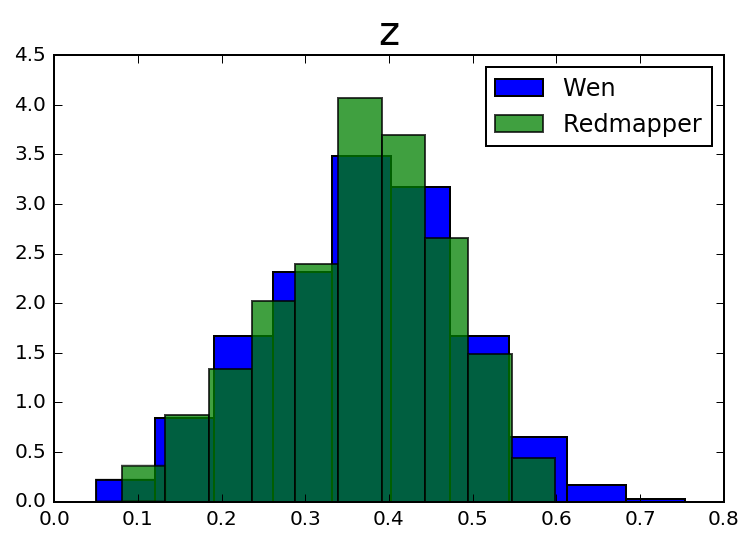

In [20]:
print ' Histogram z - Sky '
ho_z = plt.hist(o_w['zph'], normed=True, label = 'Wen')
ho_z = plt.hist(o_r['Z_LAMBDA'], normed=True, label = 'Redmapper', alpha=0.75)
plt.title('z', fontsize='20')
plt.legend()

 Histogram - Completeness - redmapper/wen - Redshift


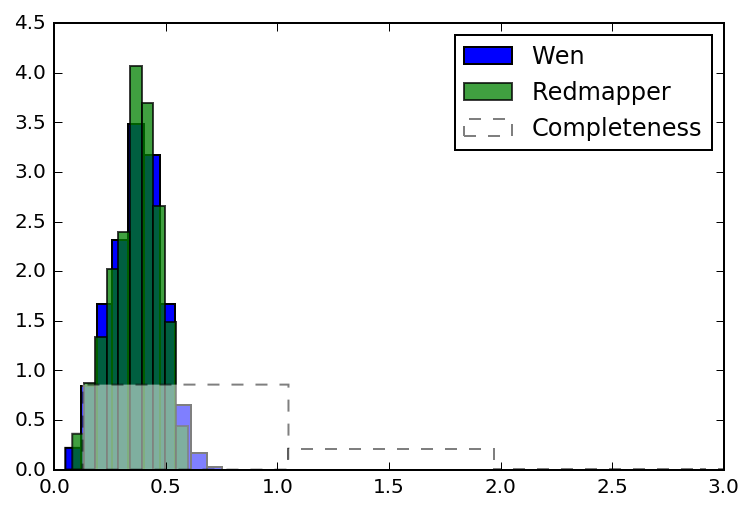

In [21]:
print ' Histogram - Completeness - redmapper/wen - Redshift'
rw = (o_w['zph'])
rr = (o_r['Z_LAMBDA'])
c = rr/rw
ho_z = plt.hist(o_w['zph'], normed=True, label = 'Wen')
ho_z = plt.hist(o_r['Z_LAMBDA'], normed=True, label = 'Redmapper', alpha=0.75)
ho_z = plt.hist(c, normed=True, linestyle='--', color = 'white', alpha = 0.5, label = 'Completeness')
plt.xlim(0, 3.0)
plt.legend()

 Histogram - Completeness - wen/redmapper - Redshift


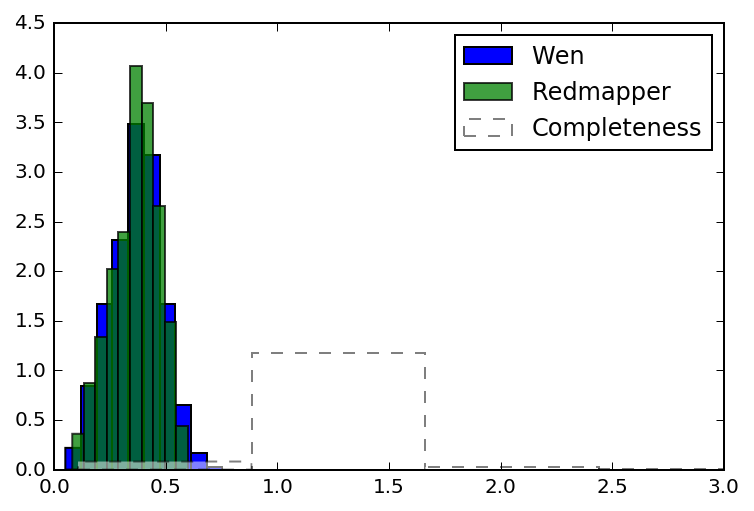

In [22]:
print ' Histogram - Completeness - wen/redmapper - Redshift'
c = rw/rr
ho_z = plt.hist(o_w['zph'], normed=True, label = 'Wen')
ho_z = plt.hist(o_r['Z_LAMBDA'], normed=True, label = 'Redmapper', alpha=0.75)
ho_z = plt.hist(c, normed=True, linestyle='--', color = 'white', alpha = 0.5, label = 'Completeness')
plt.xlim(0, 3.0)
plt.legend()

Plot z - Sky 


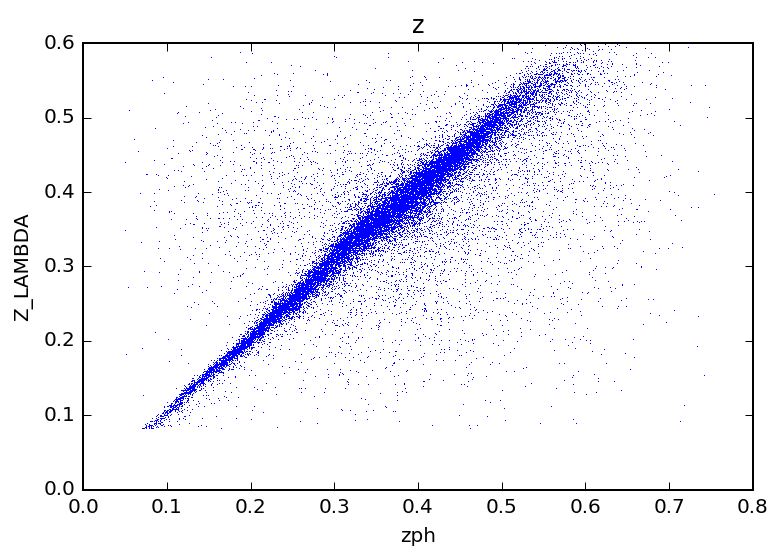

In [23]:
print 'Plot z - Sky '
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(o_w['zph'], o_r['Z_LAMBDA'], 'b,')
plt.xlabel('zph')
plt.ylabel('Z_LAMBDA')
plt.title('z')

Media = 0.00378282650782
Desvio Pdrao = 0.0693072057714


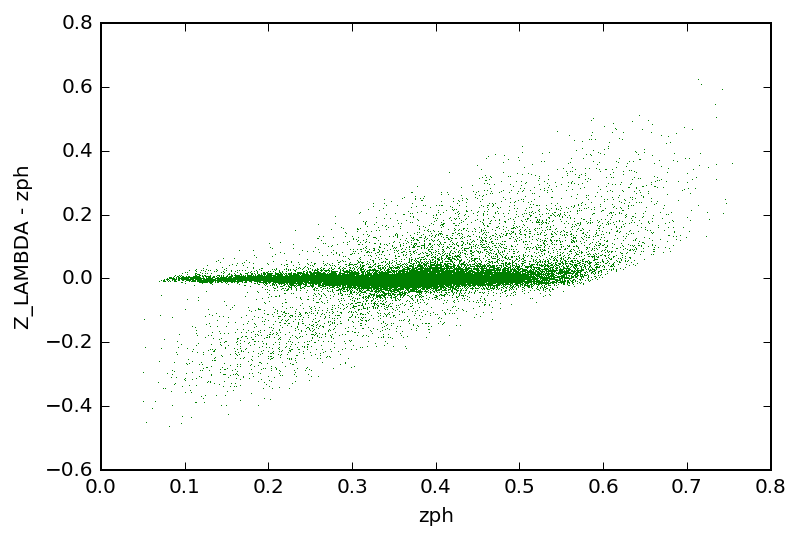

In [24]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
z = o_w['zph'] - o_r['Z_LAMBDA'] 
z_m = z
media = z_m.mean()
sigma = z_m.std()
print 'Media =',media
print 'Desvio Pdrao =',sigma
ax.plot (o_w['zph'], z, 'g,')
plt.xlim(0, 0.8)
plt.ylabel('Z_LAMBDA - zph')
plt.xlabel('zph')

Histogram richness - Sky


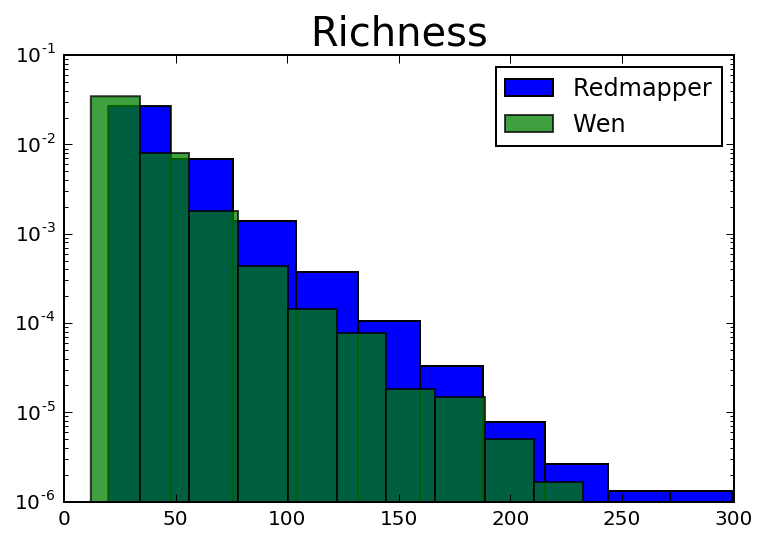

In [25]:
print 'Histogram richness - Sky'
ho_r = plt.hist(o_r['LAMBDA'], normed=True, log=True, label='Redmapper')
ho_r = plt.hist(o_w['RL*'], normed=True, log=True, label='Wen', alpha=0.75)
plt.legend()
plt.title('Richness', fontsize='20')

 Histogram - Completeness - redmapper/wen - Richness


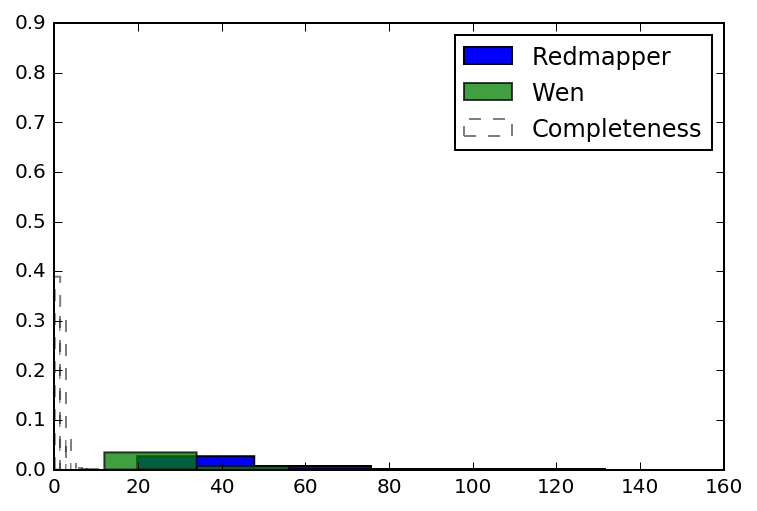

In [26]:
print ' Histogram - Completeness - redmapper/wen - Richness'
rw = (o_w['RL*'])
rr = (o_r['LAMBDA'])
c = rr/rw
ho_z = plt.hist(o_r['LAMBDA'], normed=True, label = 'Redmapper')
ho_z = plt.hist(o_w['RL*'], normed=True, label = 'Wen', alpha=0.75)
ho_z = plt.hist(c, normed=True, linestyle='--', color = 'white', alpha = 0.5, label = 'Completeness')
plt.xlim(0, 160)
plt.ylim(0, 0.9)
plt.legend()

 Histogram - Completeness - wen/redmapper - Richness


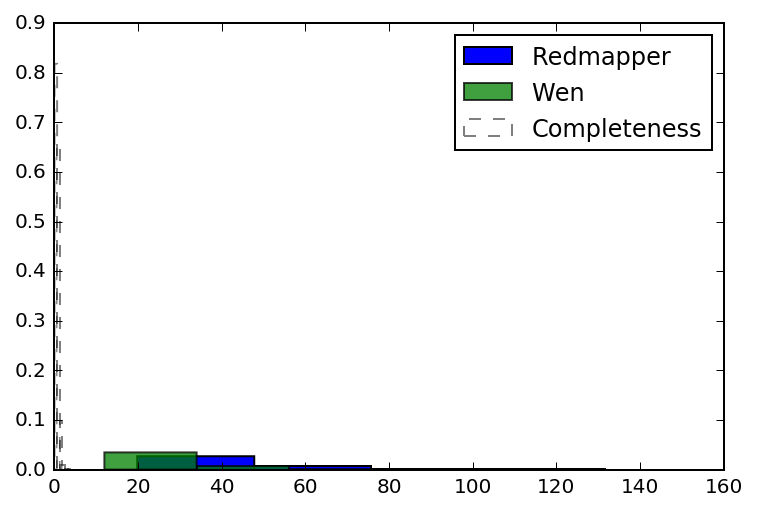

In [27]:
print ' Histogram - Completeness - wen/redmapper - Richness'
rw = (o_w['RL*'])
rr = (o_r['LAMBDA'])
c = rw/rr
ho_z = plt.hist(o_r['LAMBDA'], normed=True, label = 'Redmapper')
ho_z = plt.hist(o_w['RL*'], normed=True, label = 'Wen', alpha=0.75)
ho_z = plt.hist(c, normed=True, linestyle='--', color = 'white', alpha = 0.5, label = 'Completeness')
plt.xlim(0, 160)
plt.legend()

Plot - Completeness - Sky - Wen/Redmapper


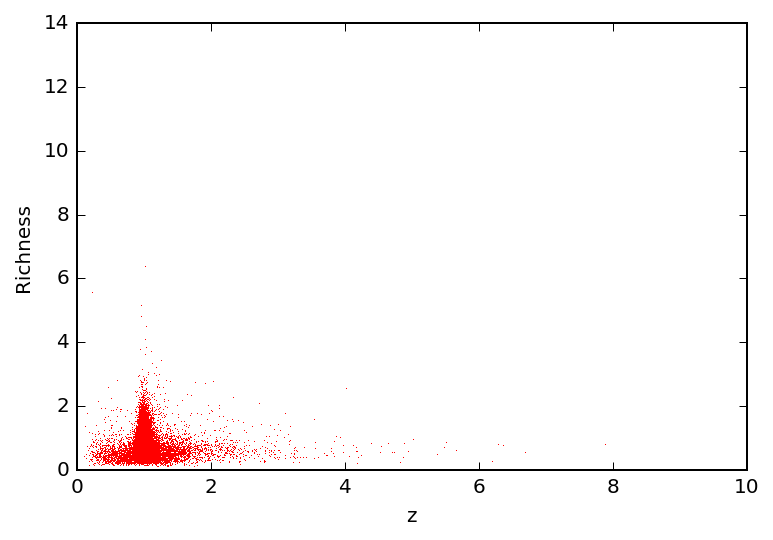

In [28]:
print 'Plot - Completeness - Sky - Wen/Redmapper'
r_w = (o_w['RL*'])
r_r = (o_r['LAMBDA'])
c = r_w/r_r
rw = (o_w['zph'])
rr = (o_r['Z_LAMBDA'])
c_c = rw/rr
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(c_c, c, 'r,')
plt.xlim(0,10)
plt.ylim(0,14)
plt.xlabel('z')
plt.ylabel('Richness')

Plot - Completeness - Sky - Redmapper/Wen 


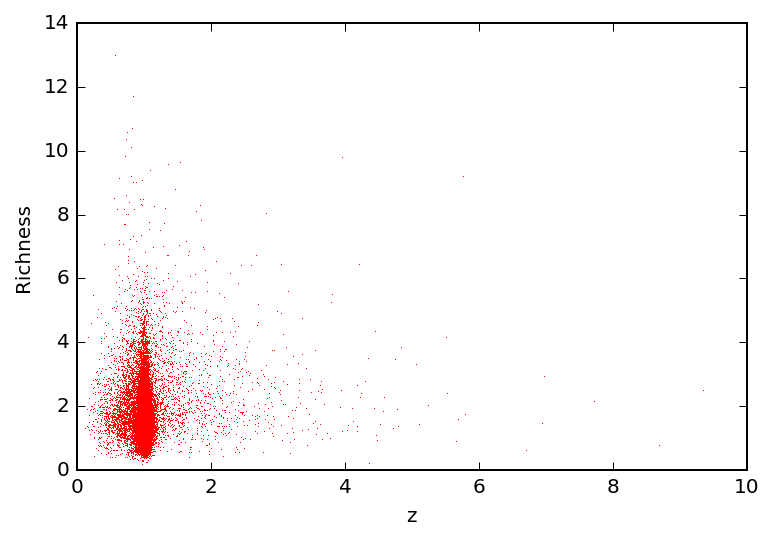

In [29]:
print 'Plot - Completeness - Sky - Redmapper/Wen '
r_w = (o_w['RL*'])
r_r = (o_r['LAMBDA'])
c = r_r/r_w
rw = (o_w['zph'])
rr = (o_r['Z_LAMBDA'])
c_c = rr/rw
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(c_c, c, 'r,')
plt.xlabel('z')
plt.ylabel('Richness')

Plot richness - Sky


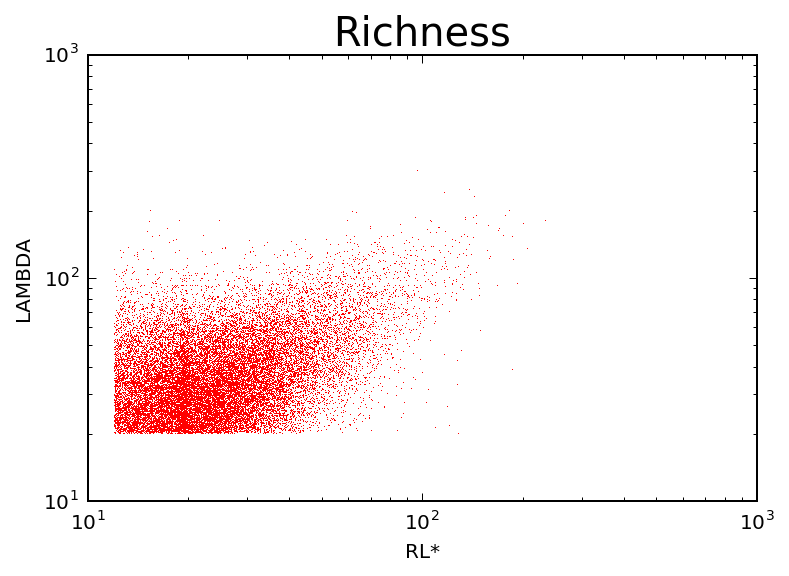

In [30]:
print 'Plot richness - Sky'
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(o_w['RL*'], o_r['LAMBDA'], 'r,')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('RL*')
plt.ylabel('LAMBDA')
plt.title('Richness', fontsize = 20)


idxcw, idxcr, d2d, d3d = cw.search_around_sky(cr, 4*u.arcmin)
#print idxc_w, idxc_r, d2d, d3d 

3D - Code, Histograms, Plots and Macth
catalog with values RA, DEC and z
Plot ra, dec and z - 3d


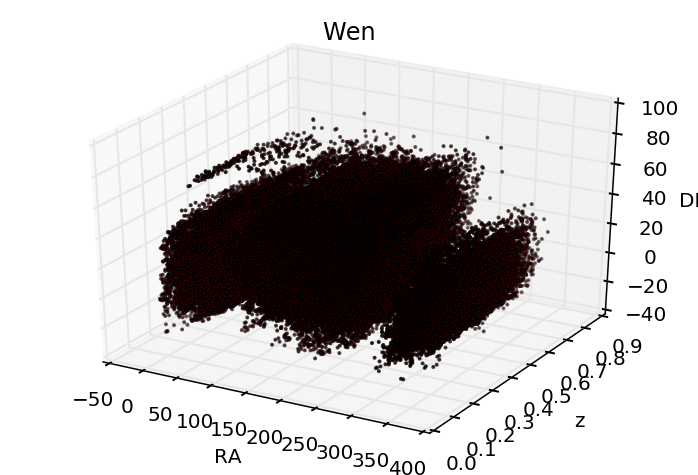

In [31]:
print("\033[43;30m3D - Code, Histograms, Plots and Macth\033[m")

print 'catalog with values RA, DEC and z'
c_w = SkyCoord(ra = w['RAJ2000']*u.deg, dec = w['DEJ2000']*u.deg, distance = cosmo.comoving_distance(w['zph'])) 
c_r = SkyCoord(ra = r['RA']*u.deg, dec = r['DEC']*u.deg, distance = cosmo.comoving_distance(r['Z_LAMBDA']))



print 'Plot ra, dec and z - 3d'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [w['RAJ2000']]
y = [w['DEJ2000']]
z = [w['zph']]

ax.scatter(x,z,y, c='r', marker = 'o', s=1)

ax.set_xlabel('RA')
ax.set_zlabel('DEC')
ax.set_ylabel('z')
ax.set_title('Wen')

#savefig('Plot-3d-Wen.png'), close()

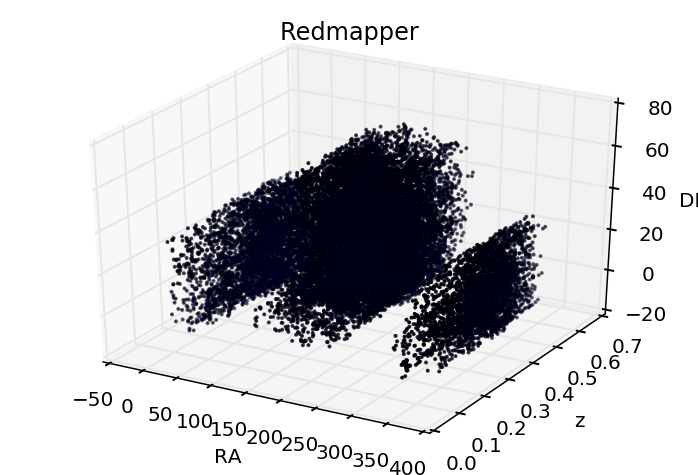

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

a = [r['RA']]
b = [r['DEC']]
c = [r['Z_LAMBDA']]

ax.scatter(a,c,b, c='b', marker = 'o', s=1)

ax.set_xlabel('RA')
ax.set_zlabel('DEC')
ax.set_ylabel('z')
ax.set_title('Redmapper')

#savefig('Plot-3d-Red.png')

In [33]:
print 'match to catalog 3d'
idx, d2d, d3d = c_w.match_to_catalog_3d(c_r) 
#print idx, d2d, d3d 

print 'match to catalog 3d'
idx, d2d, d3d = c_r.match_to_catalog_3d(c_w) 
#print idx, d2d, d3d 

match to catalog 3d
match to catalog 3d


In [34]:
print 'Objects around to catalog 3d'
idxc_w, idxc_r, d2d, d3d = c_r.search_around_3d(c_w, 1000*u.kpc) 
#print idxc_w, idexc_r, d2d, d3d

obje_w = idxc_w
obje_r = idxc_r

o_we = w[obje_w]
o_re = r[obje_r]

print 'mean and standard deviation'

delta_ra = o_re['RA'] - o_we['RAJ2000'] 
delta_dec = o_re['DEC'] - o_we['DEJ2000'] 

media_ra = delta_ra.mean()
media_dec = delta_dec.mean()

sigma_ra = delta_ra.std()
sigma_dec = delta_dec.std()

print 'Media RA =',media_ra
print 'Media DEC =',media_dec 
print 'Desvio Padrao RA =',sigma_ra
print 'Desvio Padrao DEC =',sigma_dec

print 'Completeness - 3d'

completeness_z = metrics.completeness_score(o_we['zph'], o_re['Z_LAMBDA'])
print 'Completeza Redshift =',completeness_z

completeness_r = metrics.completeness_score(o_we['RL*'], o_re['LAMBDA'])
print 'Completeza Richness =',completeness_r

Objects around to catalog 3d
mean and standard deviation
Media RA = 0.000289617140103
Media DEC = 7.71702813272e-05
Desvio Padrao RA = 0.00698414380757
Desvio Padrao DEC = 0.00694143613256
Completeness - 3d
Completeza Redshift = 0.987035144884
Completeza Richness = 0.989753108126


Histogram z - 3D


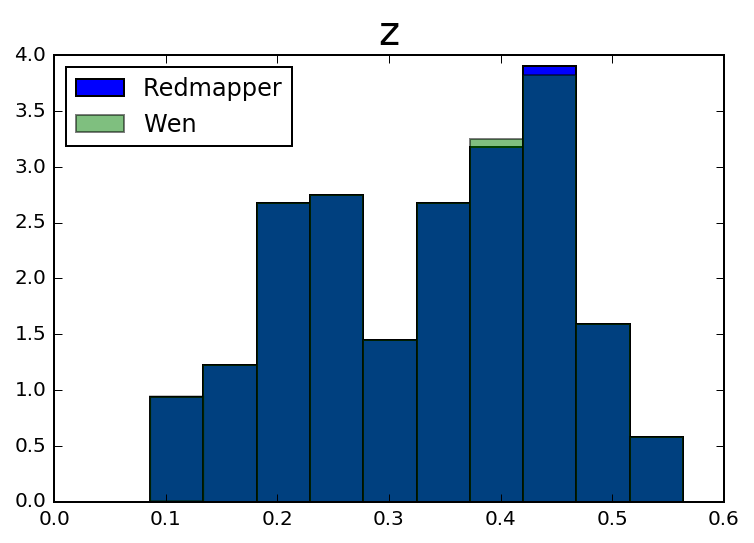

In [35]:
print 'Histogram z - 3D'

ho_z = plt.hist(o_re['Z_LAMBDA'], normed=True, label = 'Redmapper')
ho_z = plt.hist(o_we['zph'], normed=True, label = 'Wen', alpha = 0.5)
plt.legend(loc = 2)
plt.title('z', fontsize='20')

 Histogram - Completeness - wen/redmapper - Redshift


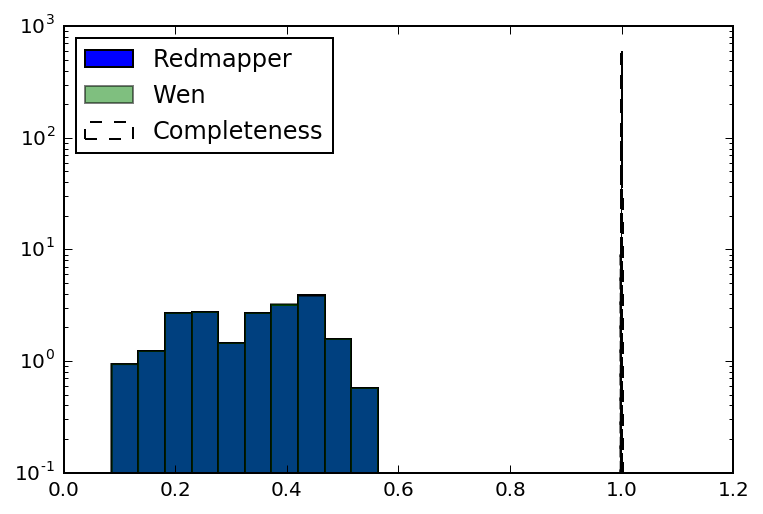

In [36]:
print ' Histogram - Completeness - wen/redmapper - Redshift'
rw = (o_we['zph'])
rr = (o_re['Z_LAMBDA'])
c = rw/rr
ho_z = plt.hist(o_re['Z_LAMBDA'], normed=True, label = 'Redmapper')
ho_z = plt.hist(o_we['zph'], normed=True, label = 'Wen', alpha = 0.5)
ho_z = plt.hist(c, normed=True, linestyle='--', color = 'white', label = 'Completeness', log = True)
plt.legend(loc=2)

 Histogram - Completeness - redmapper/wen - Redshift


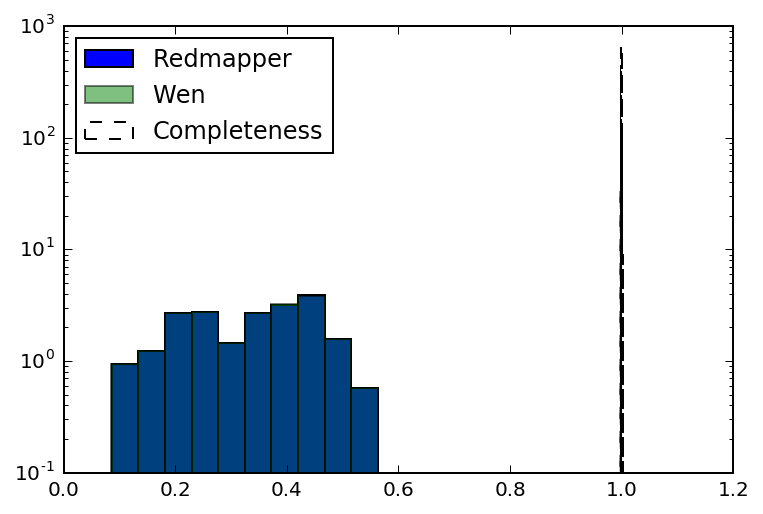

In [37]:
print ' Histogram - Completeness - redmapper/wen - Redshift'
rw = (o_we['zph'])
rr = (o_re['Z_LAMBDA'])
c = rr/rw
ho_z = plt.hist(o_re['Z_LAMBDA'], normed=True, label = 'Redmapper')
ho_z = plt.hist(o_we['zph'], normed=True, label = 'Wen', alpha = 0.5)
ho_z = plt.hist(c, normed=True, linestyle='--', color = 'white', label = 'Completeness', log = True)
plt.legend(loc=2)

Plot z - 3D


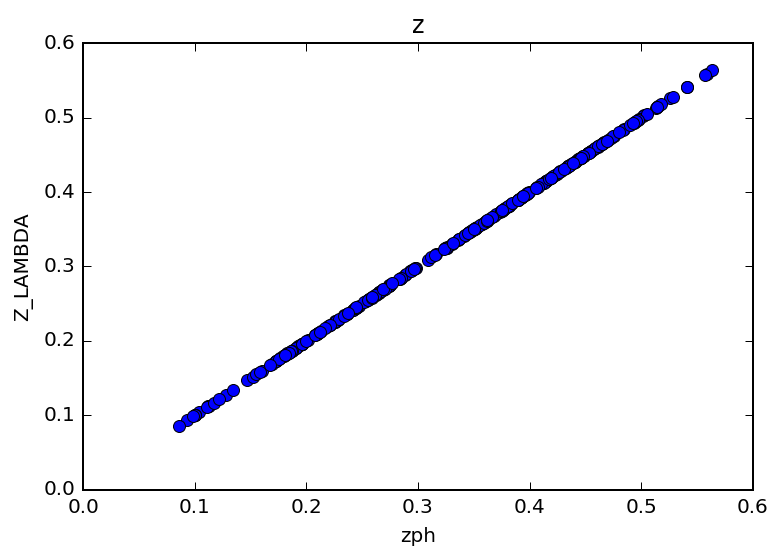

In [38]:
print 'Plot z - 3D'

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(o_we['zph'], o_re['Z_LAMBDA'], 'bo')
plt.xlabel('zph')
plt.ylabel('Z_LAMBDA')
plt.title('z')

Media = 6.22804267653e-06
Desvio Padrao = 0.000149523367319


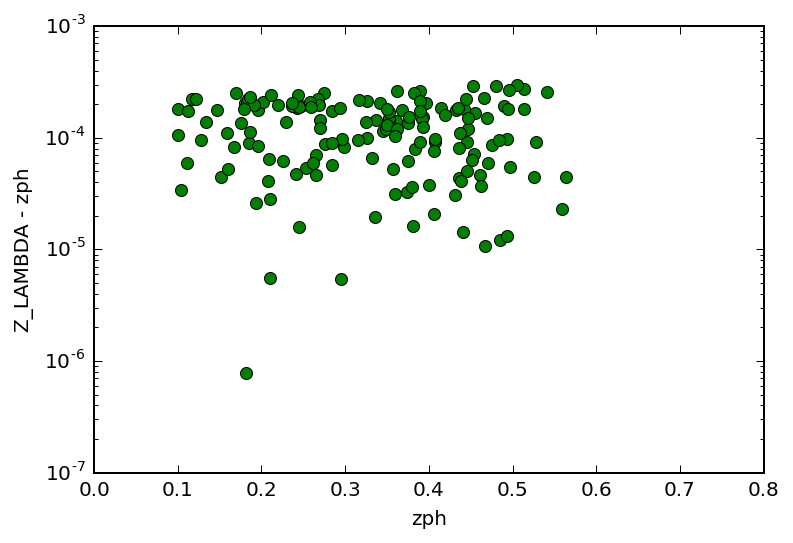

In [39]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
z =  o_we['zph'] - o_re['Z_LAMBDA'] 
z_m = z 
media = z_m.mean()
sigma = z_m.std()
print 'Media =', media
print 'Desvio Padrao =', sigma
ax.plot(o_we['zph'], z, 'go')
plt.ylabel('Z_LAMBDA - zph')
plt.xlabel('zph')
plt.xlim(0, 0.8)
ax.set_yscale('log')

Histogram richness - 3d


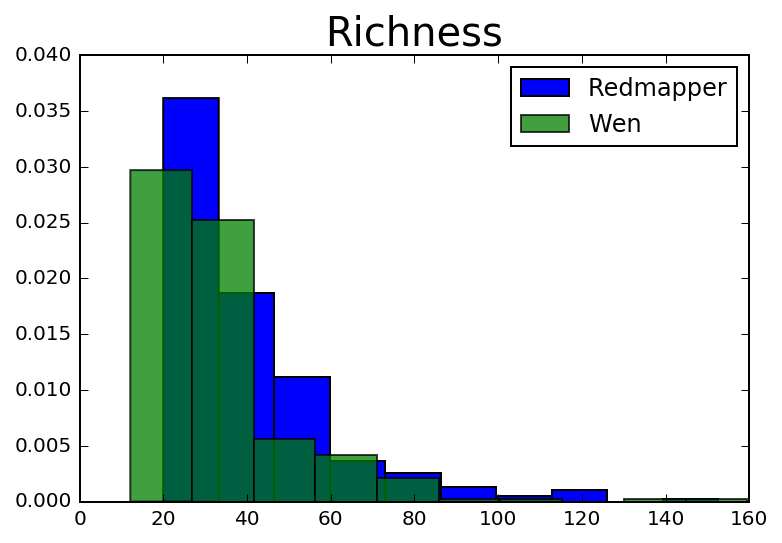

In [40]:
print 'Histogram richness - 3d'
ho_r = plt.hist(o_re['LAMBDA'], normed=True, label = 'Redmapper')
ho_r = plt.hist(o_we['RL*'], normed=True, label = 'Wen', alpha=0.75)
plt.legend()
plt.title('Richness', fontsize='20')

 Histogram - Completeness - redmapper/wen - Richness


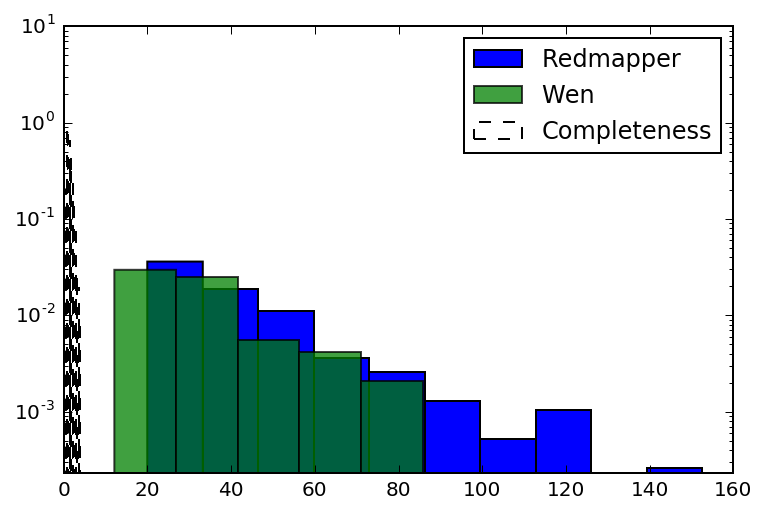

In [41]:
print ' Histogram - Completeness - redmapper/wen - Richness'
rw = (o_we['RL*'])
rr = (o_re['LAMBDA'])
c = rr/rw
ho_z = plt.hist(o_re['LAMBDA'], normed=True, label = 'Redmapper')
ho_z = plt.hist(o_we['RL*'], normed=True, label = 'Wen', alpha=0.75)
ho_z = plt.hist(c, normed=True, linestyle='--', color = 'white', label = 'Completeness', log = True)
plt.ylim(10*(-4), 10)
plt.legend()

 Histogram - Completeness - wen/redmapper - Richness


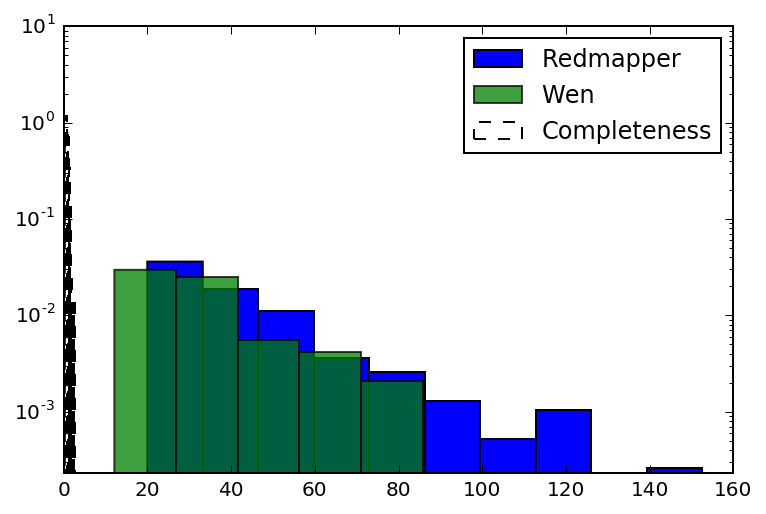

In [42]:
print ' Histogram - Completeness - wen/redmapper - Richness'
rw = (o_we['RL*'])
rr = (o_re['LAMBDA'])
c = rw/rr
ho_z = plt.hist(o_re['LAMBDA'], normed=True, label = 'Redmapper')
ho_z = plt.hist(o_we['RL*'], normed=True, label = 'Wen', alpha = 0.75)
ho_z = plt.hist(c, normed=True, linestyle='--', color = 'white', label = 'Completeness', log = True)
plt.ylim(10*(-4), 10)
plt.legend()

Plot - Completeness - 3D - Wen/Redmapper 


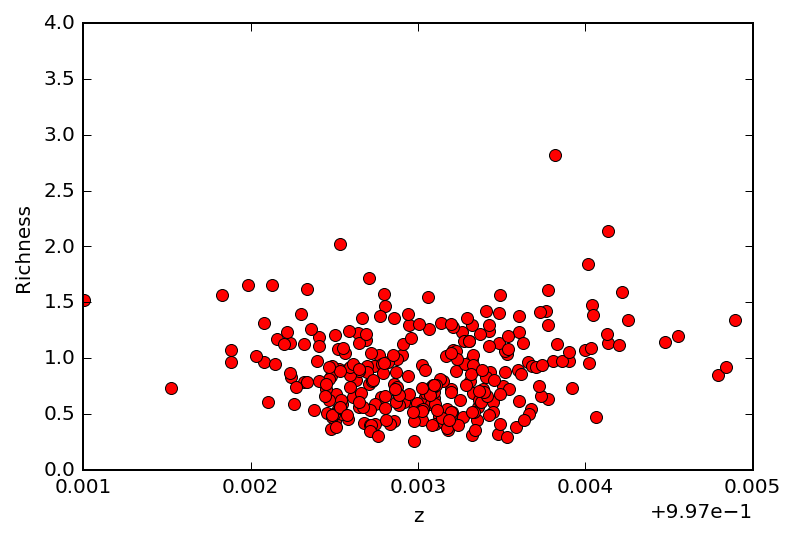

In [47]:
print 'Plot - Completeness - 3D - Wen/Redmapper '
r_w = (o_we['RL*'])
r_r = (o_re['LAMBDA'])
c = r_w/r_r
rw = (o_we['zph'])
rr = (o_re['Z_LAMBDA'])
c_c = rw/rr
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(c_c, c, 'ro')
plt.ylim(0,4.0)
plt.xlabel('z')
plt.ylabel('Richness')

Plot - Completeness - 3D - Redmapper/Wen 


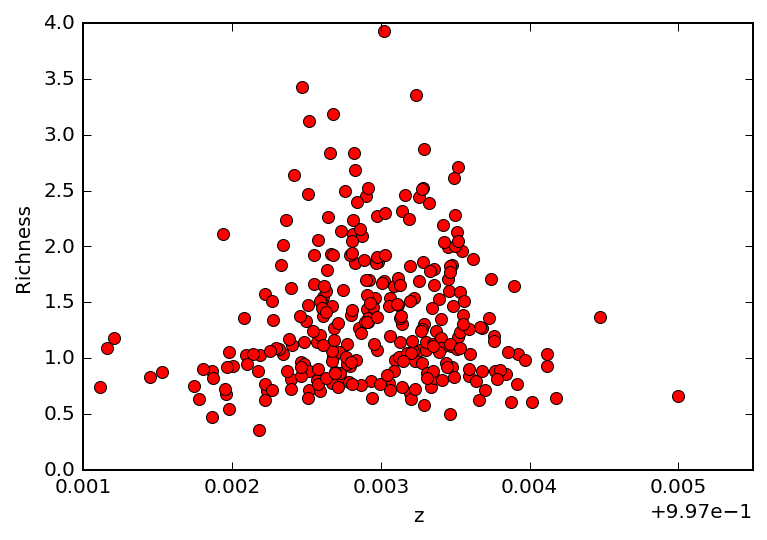

In [44]:
print 'Plot - Completeness - 3D - Redmapper/Wen '
r_w = (o_we['RL*'])
r_r = (o_re['LAMBDA'])
c = r_r/r_w
rw = (o_we['zph'])
rr = (o_re['Z_LAMBDA'])
c_c = rr/rw
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(c_c, c, 'ro')
plt.xlabel('z')
plt.ylabel('Richness')

Plot richness - 3d


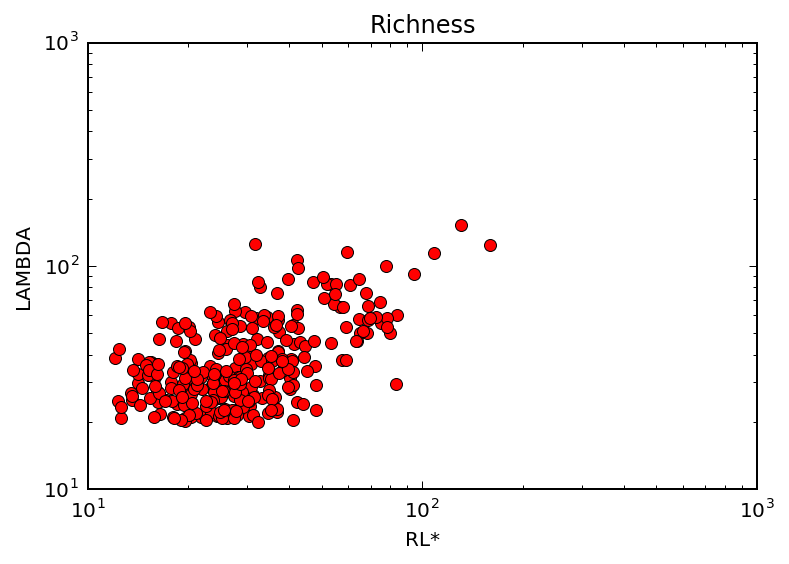

In [45]:
print 'Plot richness - 3d'

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(o_we['RL*'], o_re['LAMBDA'], 'ro')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('RL*')
plt.ylabel('LAMBDA')
plt.title('Richness')

idxc_w, idxc_r, d2d, d3d = c_w.search_around_3d(c_r, 1000*u.kpc)
#print idxc_w, idexc_r, d2d, d3d  

Plot ra, dec and z - 3d - match


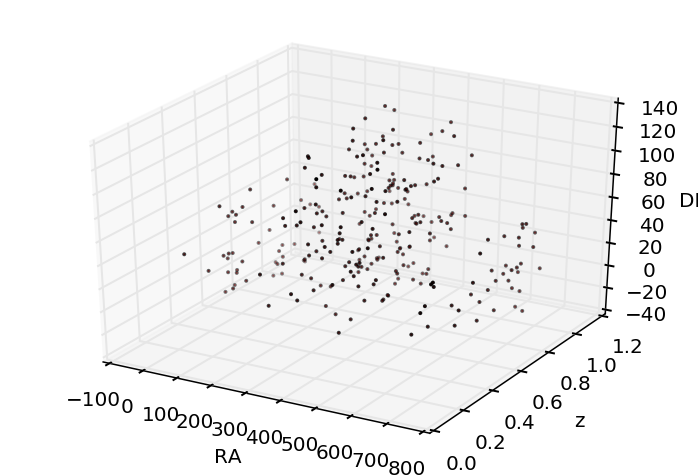

In [46]:
print 'Plot ra, dec and z - 3d - match'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [o_we['RAJ2000'] + o_re['RA']]
y = [o_we['DEJ2000'] + o_re['DEC']]
z = [o_we['zph'] + o_re['Z_LAMBDA']]

ax.scatter(x,z,y, c='r', marker = 'o', s=1)

ax.set_xlabel('RA')
ax.set_zlabel('DEC')
ax.set_ylabel('z')